In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy import polyval
from tqdm import tqdm
import string
from random import randrange


In [ ]:
def maxCrossingSum(arr, l, m, h):
 
    sm = 0
    left_sum = -10000
 
    for i in range(m, l-1, -1):
        sm = sm + arr[i]
 
        if (sm > left_sum):
            left_sum = sm
 
    sm = 0
    right_sum = -1000
    for i in range(m + 1, h + 1):
        sm = sm + arr[i]
 
        if (sm > right_sum):
            right_sum = sm
 
    return max(left_sum + right_sum, left_sum, right_sum)
 
 
def maxSubArraySum(arr, l, h):
 
    if (l == h):
        return arr[l]
 
    m = (l + h) // 2
 
    return max(maxSubArraySum(arr, l, m),
               maxSubArraySum(arr, m+1, h),
               maxCrossingSum(arr, l, m, h))

100%|██████████| 2000/2000 [00:51<00:00, 38.84it/s]


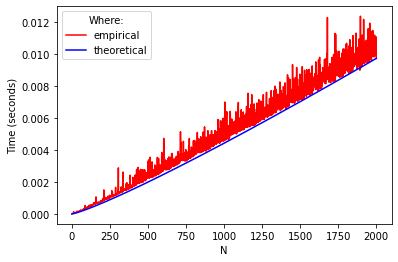

In [ ]:
#Maximum subarray sum
average_arr = []
for n in tqdm(range(1, 2001)):
  average = 0
  arr = np.random.rand(n)
  for i in range(4):
    firstTs = time.time()
    maxSubArraySum(arr, 0, n-1)
    secondTs = time.time()
    average += secondTs - firstTs
  average /= 5
  average_arr.append(average)
l_l = []
сoeff = average_arr[-1] / (2000 * math.log(2000))
for n in range(1, 2001):
  l_l.append(сoeff * n * math.log(n))
l = np.array(l_l)
y = np.arange(1, 2001)
x = np.array(average_arr)
plt.xlabel("N")
plt.ylabel("Time (seconds)")

plt.plot(y, x, color = "red", label = "empirical")
plt.plot(y, l, color = "blue", label = "theoretical")
plt.legend(title='Where:')

plt.show()

In [ ]:
# A Huffman Tree Node
class node:
	def __init__(self, freq, symbol, left=None, right=None):
		self.freq = freq
		self.symbol = symbol
		self.left = left
		self.right = right
		self.huff = ''

100%|██████████| 2000/2000 [00:22<00:00, 90.73it/s]


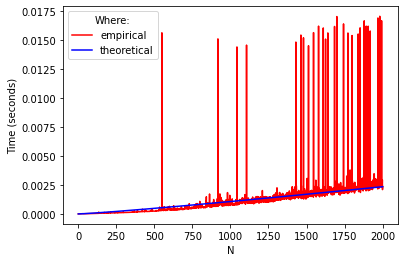

In [52]:
average_arr = []
count = len(list(string.printable))
for n in tqdm(range(1, 2001)):
  average = 0
  chars = list()
  curr_string = 'a'
  for i in range(0, n):
    chars.append(curr_string)
    curr_string += 'a'

  freq = [randrange(100) for p in range(n)]

  nodes = []
  for x in range(len(chars)):
	    nodes.append(node(freq[x], chars[x]))
  nodes = sorted(nodes, key=lambda x: x.freq)
  for i in range(4):
    firstTs = time.time()

    while len(nodes) > 1:
	    left = nodes[0]
	    right = nodes[1]
	    left.huff = 0
	    right.huff = 1
	    newNode = node(left.freq+right.freq, left.symbol+right.symbol, left, right)
	    nodes.remove(left)
	    nodes.remove(right)
	    nodes.append(newNode)
    secondTs = time.time()
    average += secondTs - firstTs
  average /= 5
  average_arr.append(average)
l_l = []
сoeff = average_arr[-1] / (2000 * math.log(2000))
for n in range(1, 2001):
  l_l.append(сoeff * n * math.log(n))
l = np.array(l_l)
y = np.arange(1, 2001)
x = np.array(average_arr)
plt.xlabel("N")
plt.ylabel("Time (seconds)")

plt.plot(y, x, color = "red", label = "empirical")
plt.plot(y, l, color = "blue", label = "theoretical")
plt.legend(title='Where:')

plt.show()